In [1]:
import numpy as np
import basix
import matplotlib.pyplot as plt
from basix import CellType, ElementFamily, LagrangeVariant, LatticeType
import jax_pn
%load_ext autoreload
%autoreload 2

In [8]:
factor = 3.0
m_cm = 1/100
water = (np.array([15.2090, 24.4140]) * m_cm,
         np.array([[[5.5069 , 0.0   ],
                  [6.6227, 11.4080]],
                  [[3.4757 /factor,  0.0    /factor],
                   [3.7043 /factor,  6.7420 /factor]]]) * m_cm)

iron = (np.array([30.3110, 26.8760]) * m_cm,
        np.array([[[18.250, 0.0   ],
                   [6.4496, 21.3570]],
                  [[13.0890  /factor ,  0.0  /factor],
                   [-0.010523/factor ,7.0373 /factor]]]) * m_cm
)

void = (np.array([0.0, 0.0]),
        np.array([[[0.0, 0.0],
                   [0.0, 0.0]],
                  [[0.0, 0.0],    
                   [0.0, 0.0]]]))

source = np.array([0.097702, 0.45451])
zero_source = np.array([0.0, 0.0])

In [9]:

lagrange    = basix.create_element(ElementFamily.P, CellType.interval, degree= 5, lagrange_variant= LagrangeVariant.gll_warped)
N_max = 5

regions = [
    (20, *water, zero_source), 
    (10, *water, source ),
    (50, *water, zero_source),
    (20, *iron,  zero_source),
    (10, *void, zero_source),
    (10, *water, zero_source),
    (10, *void,  zero_source)
]
elements_per_cm = 1



In [10]:
dpn_prob = jax_pn.DPN.DPN_Problem.from_regions_per_cm(regions, elements_per_cm, N_max, lagrange, L_scat=1)
dpn_prob.Solve_Multigroup_System("vacuum", 2)

15624


array([1.65079522e-02, 1.95008455e-02, 2.30140713e-02, ...,
       1.79705556e-10, 1.79705556e-10, 1.79705556e-10], shape=(15624,))

In [11]:
pn_prob = jax_pn.PN.PN_Problem.from_regions_per_cm(regions, elements_per_cm, N_max, lagrange, L_scat =1)
pn_prob.Solve_Multigroup_System("vacuum", 2)


7812


array([8.34616985e-03, 1.02902648e-02, 1.24267817e-02, ...,
       7.75517135e-09, 7.75517135e-09, 7.75517135e-09], shape=(7812,))

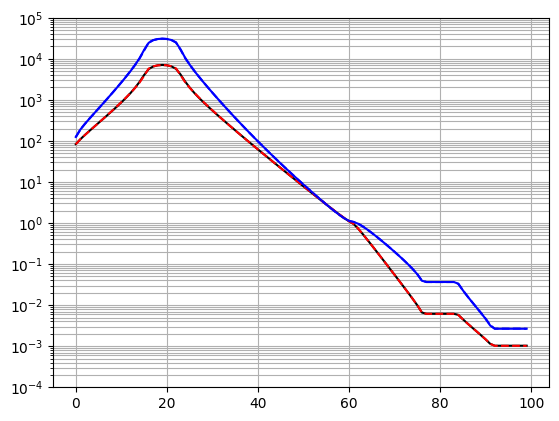

In [12]:
plt.semilogy(1e4 *(pn_prob.interpolate_solution(np.linspace(0,130, 100), energy_group = 0, k = 0)),'k')
plt.semilogy(1e4 *(pn_prob.interpolate_solution(np.linspace(0,130, 100), energy_group = 1, k = 0)),'b')


plt.semilogy(1e4 * 0.5 *(dpn_prob.interpolate_solution(np.linspace(0,130, 100), energy_group = 0, mu_sign = 1, k = 0) + dpn_prob.interpolate_solution(np.linspace(0,130, 100), energy_group = 0, mu_sign = -1, k = 0)),'r--')
plt.semilogy(1e4 * 0.5 *(dpn_prob.interpolate_solution(np.linspace(0,130, 100), energy_group = 1, mu_sign = 1, k = 0) + dpn_prob.interpolate_solution(np.linspace(0,130, 100), energy_group = 1, mu_sign = -1, k = 0)),'b--')

plt.ylim(1e-4,1e5)
plt.grid(which='both')

In [7]:
plt.figure(figsize=(10, 10))
plt.spy(pn_prob.assemble_multigroup_system("marshak",2)[0], markersize=0.4)


7812


ValueError: Unknown boundary condition: marshak. Supported: 'reflective', 'vacuum'.

<Figure size 1000x1000 with 0 Axes>

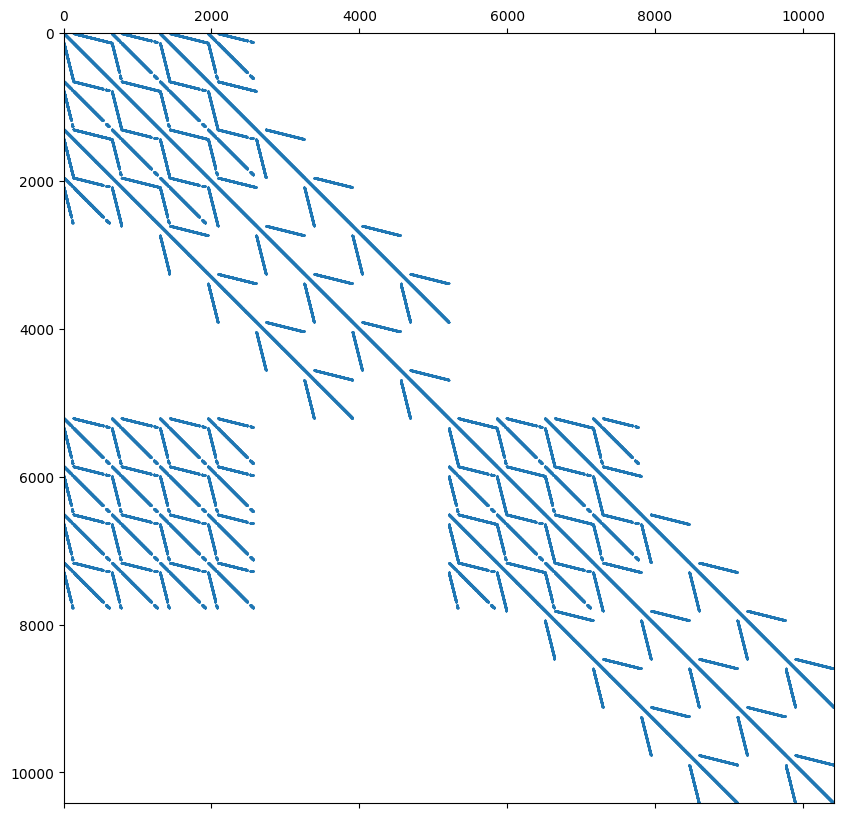

In [ ]:
plt.figure(figsize=(10, 10))
plt.spy(dpn_prob.assemble_multigroup_system("vacuum",2)[0], markersize=0.4)
